*Интерполяция и численное интегрирование. Формула ошибок.*

Построить $11$ точек, взяв$$
x_i = \frac{i-1}{10}, \quad y_i = {\rm erf} x_i\quad (i=1,\dots,11),
$$где$$
{\rm erf} x = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$– функция ошибок.

Составить систему линейных уравнений для нахождения коэффициентов интерполирующего многочлена $10$-ой степени. Найти число обусловленности этой системы. Решить составленную систему. С помощью построенного интерполянта протабулировать значение функции в промежуточных точках.

Сравнить коэффициенты построенного интерполирующего многочлена с коэффициентами многочлена, который можно получить с помощью функции numpy.polyfit.

Постройть кубический эрмитов интерполянт и кубический сплайн. Найти значения интерполянтов в тех же точках, что и в предыдущих пунктах и сравнить результаты.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy import interpolate
from scipy import special

Вводим исходные данные.

In [2]:
x=[0]*11
for i in range(len(x)):
    x[i]=((i)/10)
x

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [3]:
y=special.erf(x)
y

array([0.        , 0.11246292, 0.22270259, 0.32862676, 0.42839236,
       0.52049988, 0.60385609, 0.67780119, 0.74210096, 0.79690821,
       0.84270079])

Отрисовываем исходные точки на графике.

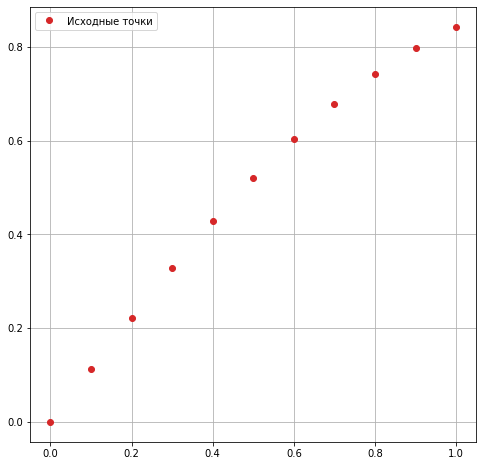

In [4]:
fig1=plt.figure(figsize=[8,8])
plt.plot(x,y,"o",label="Исходные точки",color="tab:red")
plt.legend()
plt.grid()

*Задача полиномиальной интерполяции.* Предположим,
что для некоторой функции f(x) известны значения в различных точках $x_i,$  $i = 0, ··· , n: f(x_i) = f_i.$ Требуется построить
полином$$
P_n(x) = a_0 + a_1x + a_2x_2 + ... + a_nx_n(1)$$ степени (не выше) n, такой что$$
P_n(x_i) = f_i, i = 0, ··· ,n.(2)$$
Полином $P_n(x)$ при этом называется интерполяционным, а
точки $x_i$ – узлами интерполяции.

*Утверждение.* Для любого n = 0, 1, 2, ··· задача полиномиальной интерполяции имеет единственное решение. То есть,
для произвольных значений $x_i, f_i ∈ R (i = 0, ··· , n)$ существует единственный интерполяционный полином $P_n$ степени
не выше n, принимающий заданные значения $f_i$ в $n + 1$ узлах
$x_i$.

Доказательство. Равенство (2) с учетом (1) можно записать в виде системы линейных уравнений относительно неизвестных коэффициентов $a_0, a_1,...,a_n$ интерполяционного полинома:
$$
a =  
\left(
\begin{array}{c}
    a_0     \\
    a_1     \\
    \vdots  \\
    a_n     \\
\end{array}
\right)
\qquad
f =
\left(
\begin{array}{c}
    f_0     \\
    f_1     \\
   \vdots   \\
    f_n     \\
\end{array}
\right),
$$
где
$$
W = 
\left(
\begin{array}{ccccc}
    1 &     x_0 &     x_0^2 & \dots &    x_0^n\\
    1 &     x_1 &     x_1^2 & \dots &    x_1^n\\
\dots&\dots&\dots&\dots&\dots \\
    1 &     x_n &     x_n^2 & \dots &    x_n^n\\
\end{array}
\right).
$$

Матрицу W называют матрицей Вандермонда (Alexandre–Theophile Vandermonde, 1735 – 1796). Определитель матрицы W – это определитель Вандермонда, о котором известно, что он отличен от нуля, если среди $x_i$ нет совпадающих значений. Это означает, что система линейных уравнений единственным образом определяет коэффициенты $a_0, a_1, ..., a_n$ интерполяционного полинома. 

Таким образом вытекает равенство $a * W = f$.

Находим число обусловленности с помощью матрицы Вандермонда.

In [5]:
vand=np.vander(x)
np.linalg.cond(vand)

115575244.56022082

Так как число обусловленности далеко от 1, значит матрица плохо обусловлена и погрешность в решении будет довольно большой.

Найдём зависимость числа обусловленности от степени интерпалирующего многочлена.

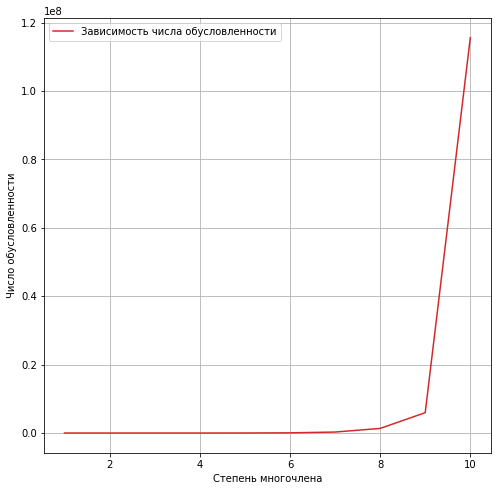

In [6]:
x1=[0]
for i in range(len(x1)):
    x1[i]=i/10
x2=[0]*2
for i in range(len(x2)):
    x2[i]=i/10
x3=[0]*3
for i in range(len(x3)):
    x3[i]=i/10
x4=[0]*4
for i in range(len(x4)):
    x4[i]=i/10
x5=[0]*5
for i in range(len(x5)):
    x5[i]=i/10
x6=[0]*6
for i in range(len(x6)):
    x6[i]=i/10
x7=[0]*7
for i in range(len(x7)):
    x7[i]=i/10
x8=[0]*8
for i in range(len(x8)):
    x8[i]=i/10
x9=[0]*9
for i in range(len(x9)):
    x9[i]=i/10
x10=[0]*10
for i in range(len(x10)):
    x10[i]=i/10
vand1=np.vander(x1)
vand2=np.vander(x2)
vand3=np.vander(x3)
vand4=np.vander(x4)
vand5=np.vander(x5)
vand6=np.vander(x6)
vand7=np.vander(x7)
vand8=np.vander(x8)
vand9=np.vander(x9)
vand10=np.vander(x10)
stepen=np.arange(1,11,1)
obuslov=np.array([np.linalg.cond(vand1),np.linalg.cond(vand2),np.linalg.cond(vand3),np.linalg.cond(vand4),np.linalg.cond(vand5),np.linalg.cond(vand6),np.linalg.cond(vand7),np.linalg.cond(vand8),np.linalg.cond(vand9),np.linalg.cond(vand)])
fig2=plt.figure(figsize=[8,8])
plt.plot(stepen,obuslov, label="Зависимость числа обусловленности",color="tab:red")
plt.xlabel("Cтепень многочлена")
plt.ylabel("Число обусловленности")
plt.legend()
plt.grid()

По графику плохо заметно увеличение числа обусловленности от степени многочлена из-за маштаба.

In [7]:
print(np.linalg.cond(vand1))
print(np.linalg.cond(vand2))
print(np.linalg.cond(vand3))
print(np.linalg.cond(vand4))
print(np.linalg.cond(vand5))
print(np.linalg.cond(vand6))
print(np.linalg.cond(vand7))
print(np.linalg.cond(vand8))
print(np.linalg.cond(vand9))
print(np.linalg.cond(vand10))
print(np.linalg.cond(vand))

1.0
20.050124999218763
217.4642319668641
1656.3703013997863
10333.05759790563
56986.0989534672
286830.17568713514
1342566.3394715602
5952811.868432442
25681357.134969193
115575244.56022082


Но, судя по значениям, наблюдается прямая зависимость.

Решим составленную систему

In [8]:
res=np.linalg.solve(vand,y)
res

array([-1.46537036e-03,  5.41662268e-03,  2.13905315e-03, -2.99669744e-02,
        2.22912461e-03,  1.11876424e-01,  2.56838182e-04, -3.76167525e-01,
        3.55779434e-06,  1.12837904e+00,  0.00000000e+00])

Мы не можем считать это решение на 100% верным, из-за большого числа обусловленности. Убедимся в этом выполнив проверку.

In [9]:
yres=np.dot(res,vand)
print(y)
print(yres)

[0.         0.11246292 0.22270259 0.32862676 0.42839236 0.52049988
 0.60385609 0.67780119 0.74210096 0.79690821 0.84270079]
[0.38292689 0.42219901 0.4644863  0.50960028 0.55715957 0.60654209
 0.65685698 0.7069608  0.75552814 0.80119006 0.84270079]


Как можно заметить погрешность действительно присутствует.

Получим коэффиценты многочлена 10ой степени с помощью numpy.polyfit и построим график интерполирующей  функции.

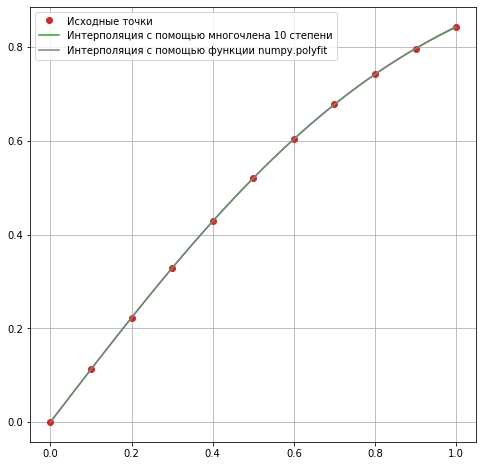

In [10]:
res_plf=np.polyfit(x,y,10)
interx=np.array([i for i in np.arange(0,1,0.001)])
intery=res[10]+res[9]*interx+res[8]*interx**2+res[7]*interx**3+res[6]*interx**4+res[5]*interx**5+res[4]*interx**6+res[3]*interx**7+res[2]*interx**8+res[1]*interx**9+res[0]*interx**10
intery_plf=res_plf[10]+res_plf[9]*interx+res_plf[8]*interx**2+res_plf[7]*interx**3+res_plf[6]*interx**4+res_plf[5]*interx**5+res_plf[4]*interx**6+res_plf[3]*interx**7+res_plf[2]*interx**8+res_plf[1]*interx**9+res_plf[10]*interx**10
fig3=plt.figure(figsize=[8,8])
plt.plot(x,y,"o",label="Исходные точки",color="tab:red")
plt.plot(interx,intery,label="Интерполяция с помощью многочлена 10 степени",color="tab:green")
plt.plot(interx,intery_plf,label="Интерполяция с помощью функции numpy.polyfit",color="tab:grey")
plt.legend()
plt.grid()

In [11]:
print(res)
print(res_plf)

[-1.46537036e-03  5.41662268e-03  2.13905315e-03 -2.99669744e-02
  2.22912461e-03  1.11876424e-01  2.56838182e-04 -3.76167525e-01
  3.55779434e-06  1.12837904e+00  0.00000000e+00]
[-1.46537048e-03  5.41662325e-03  2.13905198e-03 -2.99669730e-02
  2.22912365e-03  1.11876424e-01  2.56838068e-04 -3.76167525e-01
  3.55779287e-06  1.12837904e+00 -4.34087293e-17]


Разницы между полученными коэффицентами нет, кроме последнего.

Найдём абсолютную ошибку.

In [12]:
np.polyval(res, 0.8)
absol_pog=abs(np.polyval(res, 0.8)-y[8])
absol_pog

1.1102230246251565e-16

Найдём относительную ошибку.

In [13]:
otnos_pog=absol_pog/y[8]
otnos_pog

1.496053875987767e-16

Построим кубический эрмитов интерполянт.

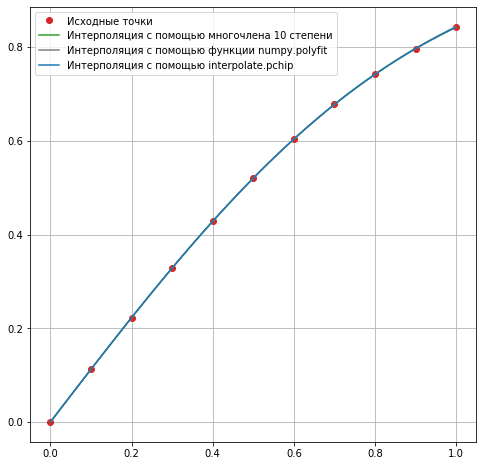

In [14]:
erm_inter=interpolate.pchip(x,y)
fig4=plt.figure(figsize=[8,8])
plt.plot(x,y,"o",label="Исходные точки",color="tab:red")
plt.plot(interx,intery,label="Интерполяция с помощью многочлена 10 степени",color="tab:green")
plt.plot(interx,intery_plf, label="Интерполяция с помощью функции numpy.polyfit",color="tab:grey")
plt.plot(interx,erm_inter(interx),label="Интерполяция с помощью interpolate.pchip",color="tab:blue")
plt.legend()
plt.grid()

Построим кубический сплайн.

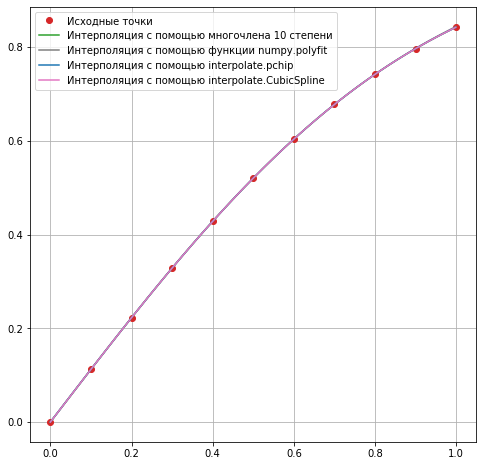

In [15]:
cub_spline=interpolate.CubicSpline(x,y)
fig4=plt.figure(figsize=[8,8])
plt.plot(x,y,"o",label="Исходные точки",color="tab:red")
plt.plot(interx,intery, label="Интерполяция с помощью многочлена 10 степени",color="tab:green")
plt.plot(interx,intery_plf, label="Интерполяция с помощью функции numpy.polyfit",color="tab:grey")
plt.plot(interx,erm_inter(interx), label="Интерполяция с помощью interpolate.pchip",color="tab:blue")
plt.plot(interx,cub_spline(interx), label="Интерполяция с помощью interpolate.CubicSpline",color="tab:pink")
plt.legend()
plt.grid()

Из последнего графика уже видно, что значения всех интерполянтов во всех точках равны, но для наглядности возьмём ещё несколько произвольных точек.

In [16]:
dots=np.array([0.18,0.254,0.321])
print(erm_inter(dots))
print(cub_spline(dots))
print(np.polyval(res, dots))

[0.20097158 0.28056868 0.35010775]
[0.20093525 0.28056165 0.35014367]
[0.20093584 0.28056219 0.35014422]


Как видим, они тоже равны.